In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('/content/Google_train_data.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [30]:
df.shape

(1258, 6)

In [31]:
df.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


## Exploratory Data Analysis

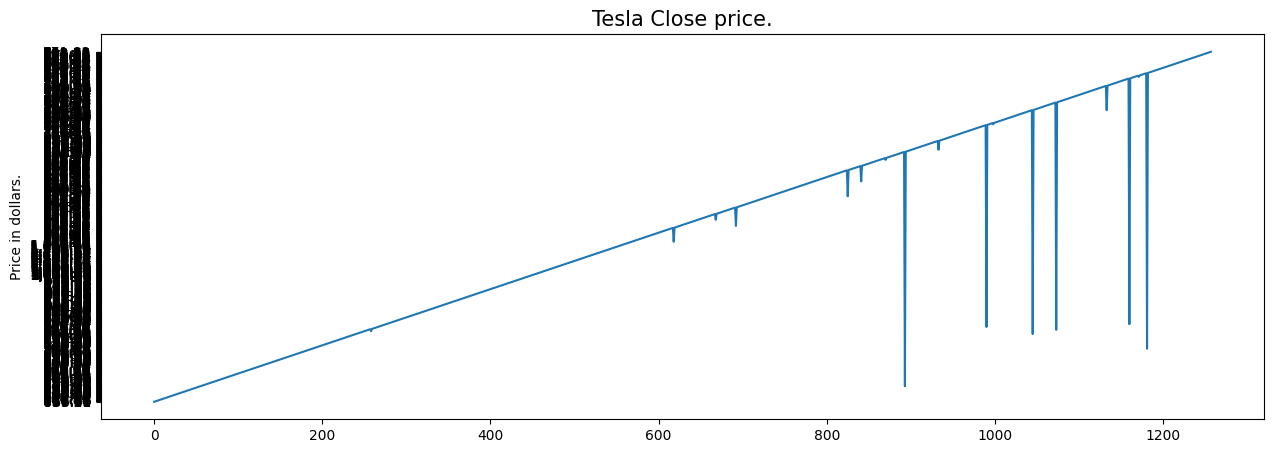

In [32]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [33]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [35]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

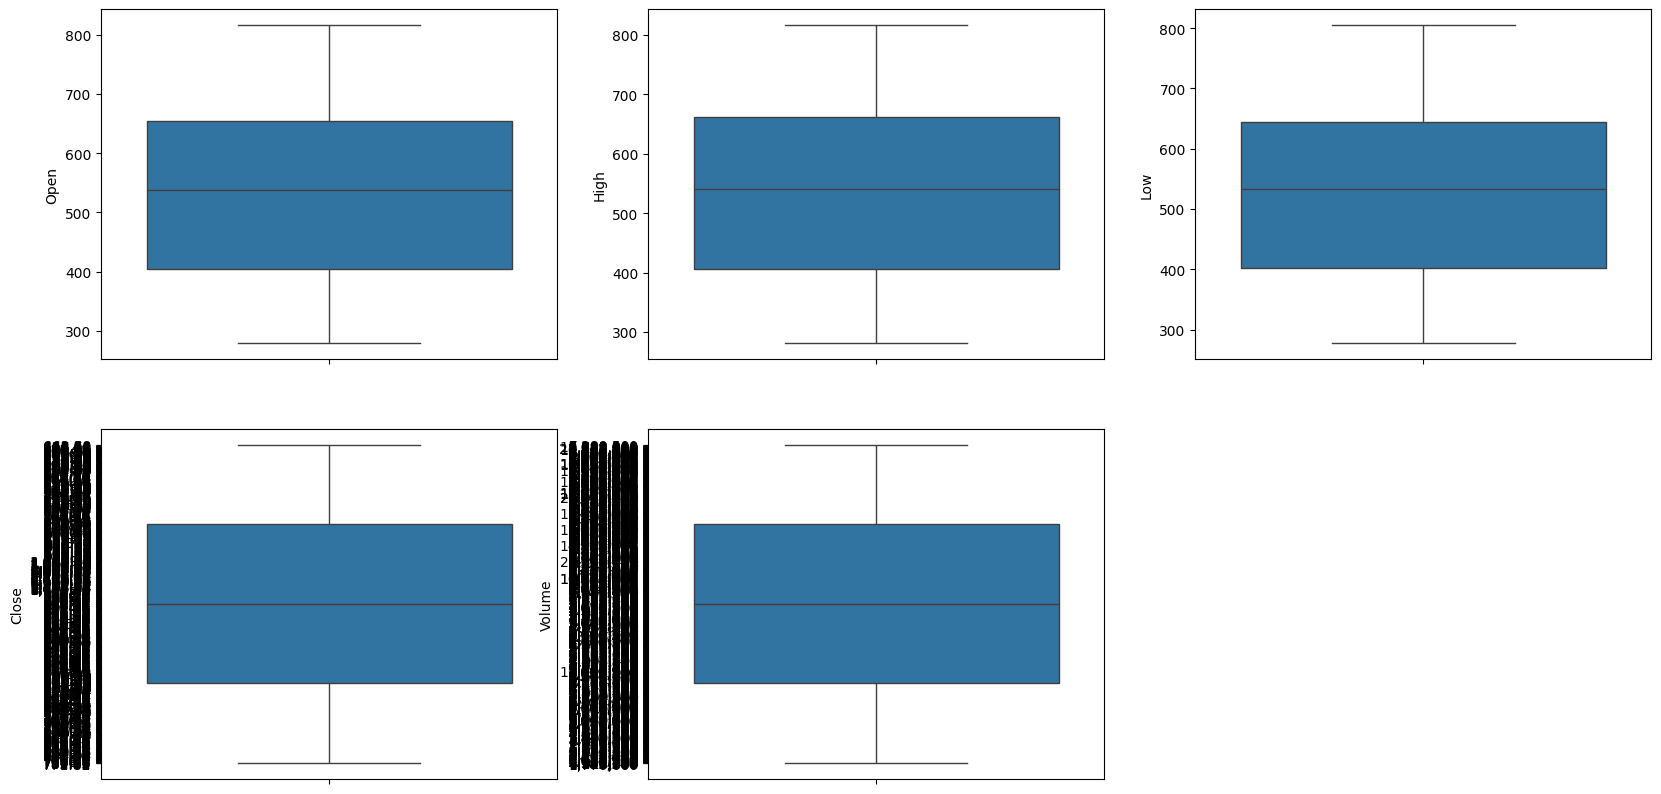

In [38]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [39]:
training_set = df.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [40]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [41]:
x_train=[]
y_train=[]
for i in range(60,1258):
  x_train.append(scaled_training_set[i-60:i,0])
  y_train.append(scaled_training_set[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)

In [42]:
print(x_train.shape)

(1198, 60)


In [43]:
print(y_train.shape)

(1198,)


In [44]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

In [45]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [46]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences= True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [47]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 9s 22ms/step - loss: 0.0455
Epoch 2/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0058
Epoch 5/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0051
Epoch 9/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0040
Epoch 13/100
38/38 [=====

In [48]:
d_test = pd.read_csv("/content/Google_test_data.csv")
actual_stock_price = d_test.iloc[:,1:2].values

In [51]:
d_total=pd.concat((df['Open'], d_test['Open']), axis=0)
inputs = d_total[len(d_total)-len(d_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

x_test = []
for i in range (60,80):
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [53]:
predi_sp = regressor.predict(x_test)
predi_sp = scaler.inverse_transform(predi_sp)

1/1 [==============================] - 0s 62ms/step


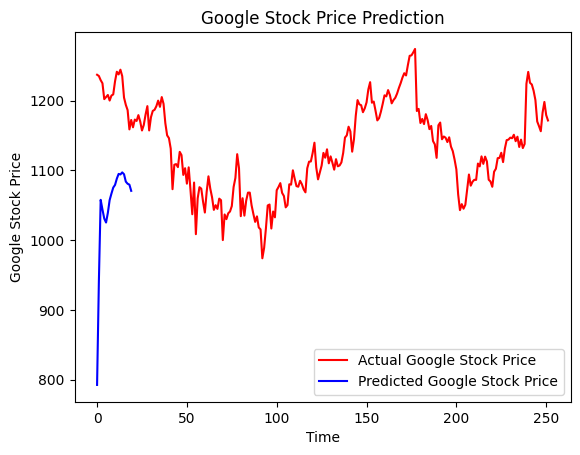

In [55]:
plt.plot(actual_stock_price, color='red', label='Actual Google Stock Price')
plt.plot(predi_sp, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()